# Dataframe Chunks and CSV Export

<b> This script takes a large DataFrame, splits it into smaller chunks, and saves each chunk as a separate CSV file. Each file will contain a specified number of rows. The script is useful for handling and processing large datasets by breaking them into more manageable parts.</b>

<b>How to Use</b>
<li>Place the script in your project directory.
<li>Customize the DataFrame (df_phone_alici in the example) and the rows_per_file as needed.
<li>Run the script to generate the split CSV files.

In [1]:
import pandas as pd
import numpy as np

# Function to split a large DataFrame into multiple CSV files
def split_dataframe_to_csv(df, rows_per_file, base_filename):
    """
    Splits a DataFrame into multiple CSV files.

    Parameters:
    df (pd.DataFrame): The DataFrame to split.
    rows_per_file (int): The number of rows per CSV file.
    base_filename (str): The base name for the output CSV files.

    Returns:
    List[str]: A list of filenames of the generated CSV files.
    """
    # Calculate the number of files needed
    num_files = int(np.ceil(len(df) / rows_per_file))

    # Split the DataFrame and save to CSV files
    filenames = []
    for i in range(num_files):
        start_row = i * rows_per_file
        end_row = min((i + 1) * rows_per_file, len(df))
        df_chunk = df[start_row:end_row]
        filename = f'{base_filename}_{(i + 1) * rows_per_file}K.csv'
        df_chunk.to_csv(filename, index=False)
        filenames.append(filename)
    
    return filenames

# Example usage with a sample DataFrame
if __name__ == "__main__":
    # Create a sample large DataFrame
    data = {
        'Phone Number': [f'+123456789{i}' for i in range(1, 100001)],
        'Status': ['ONAY'] * 100000
    }
    df_phone_alici = pd.DataFrame(data)

    # Specify the number of rows per CSV file
    rows_per_file = 10000

    # Call the function to split the DataFrame
    filenames = split_dataframe_to_csv(df_phone_alici, rows_per_file, 'phone_numbers')

    # Print the generated filenames
    print("Generated CSV files:", filenames)


Generated CSV files: ['phone_numbers_10000K.csv', 'phone_numbers_20000K.csv', 'phone_numbers_30000K.csv', 'phone_numbers_40000K.csv', 'phone_numbers_50000K.csv', 'phone_numbers_60000K.csv', 'phone_numbers_70000K.csv', 'phone_numbers_80000K.csv', 'phone_numbers_90000K.csv', 'phone_numbers_100000K.csv']


# Normalization & Outlier Handling

<b>This script performs outlier analysis on a DataFrame using different methods such as IQR, Z-Score, and Hampel Filter. It also includes a function to normalize the data. The script is useful for identifying and handling outliers in a dataset.</b>

<b>How to Use</b>
<li>Place the script in your project directory.
<li>Customize the DataFrame (df_sample in the example) as needed.
<li>Run the script to normalize the data and detect outliers using various methods.

Normalized DataFrame:
       Value
0   0.000000
1   0.022222
2   0.022222
3   0.033333
4   0.022222
5   0.022222
6   0.055556
7   0.044444
8   0.033333
9   0.000000
10  1.000000
11  0.022222
12  0.011111
13  0.033333
14  0.044444
15  0.055556
16  0.033333
17  0.033333
18  0.044444
19  0.055556

Outliers detected using IQR:
    Value
10    100


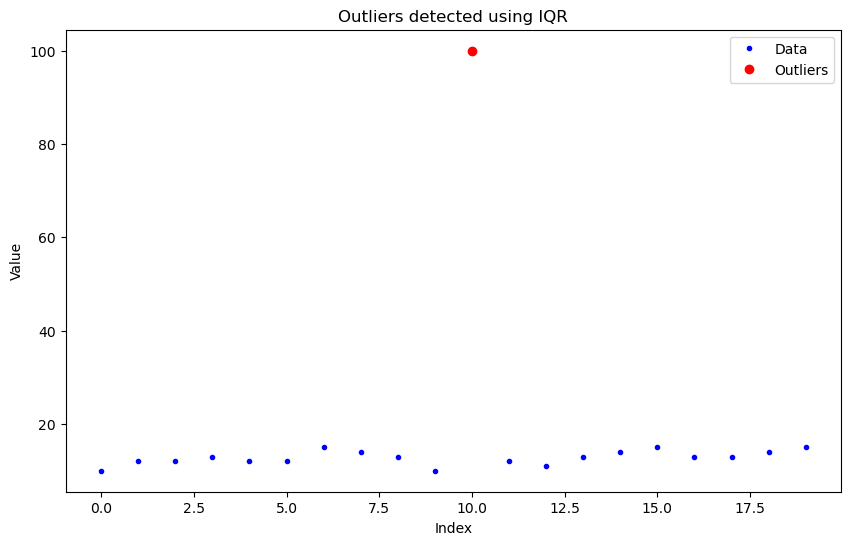


Outliers detected using Z-Score:
    Value
10    100


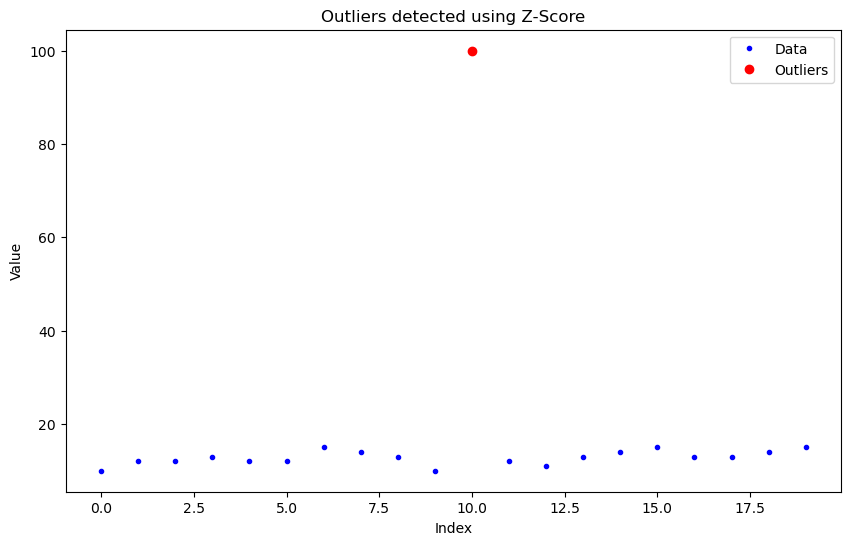


Outliers detected using Hampel filter:
    Value
10    100


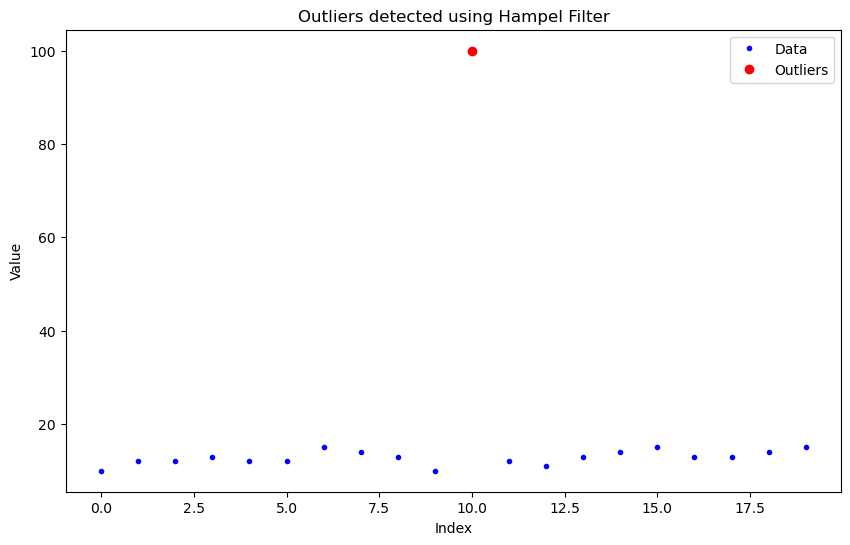

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Function to normalize a DataFrame
def normalize_dataframe(df):
    return (df - df.min()) / (df.max() - df.min())

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return np.abs(z_scores) > threshold

# Function to detect outliers using Hampel filter
def detect_outliers_hampel(df, column, window_size=5, n_sigmas=3):
    series = df[column]
    k = 1.4826  # scale factor for Gaussian distribution
    rolling_median = series.rolling(window=window_size, center=True).median()
    MAD = (series - rolling_median).abs().rolling(window=window_size, center=True).median()
    threshold = n_sigmas * k * MAD
    difference = (series - rolling_median).abs()
    return difference > threshold

# Function to plot outliers
def plot_outliers(df, column, outliers, method_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df[column], 'b.', label='Data')
    plt.plot(df[column][outliers], 'ro', label='Outliers')
    plt.title(f'Outliers detected using {method_name}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage with a sample DataFrame
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'Value': [10, 12, 12, 13, 12, 12, 15, 14, 13, 10, 100, 12, 11, 13, 14, 15, 13, 13, 14, 15]
    }
    df_sample = pd.DataFrame(data)

    # Normalize the DataFrame
    df_normalized = normalize_dataframe(df_sample)
    print("Normalized DataFrame:")
    print(df_normalized)

    # Detect outliers using IQR
    outliers_iqr = detect_outliers_iqr(df_sample, 'Value')
    print("\nOutliers detected using IQR:")
    print(df_sample[outliers_iqr])
    plot_outliers(df_sample, 'Value', outliers_iqr, 'IQR')

    # Detect outliers using Z-Score
    outliers_zscore = detect_outliers_zscore(df_sample, 'Value')
    print("\nOutliers detected using Z-Score:")
    print(df_sample[outliers_zscore])
    plot_outliers(df_sample, 'Value', outliers_zscore, 'Z-Score')

    # Detect outliers using Hampel filter
    outliers_hampel = detect_outliers_hampel(df_sample, 'Value')
    print("\nOutliers detected using Hampel filter:")
    print(df_sample[outliers_hampel])
    plot_outliers(df_sample, 'Value', outliers_hampel, 'Hampel Filter')


# Data Summary

<b>This script provides functions to clean a DataFrame by removing duplicates, handling missing values, filtering rows based on conditions, and generating summary statistics. It is useful for preprocessing and exploring datasets.</b>

<b>How to Use</b>
<li>Place the script in your project directory.
<li>Customize the DataFrame (df_sample in the example) and the conditions for filtering as needed.
<li>Run the script to clean the DataFrame, filter it based on conditions, and generate summary statistics.

In [3]:
import pandas as pd

# Function to clean a DataFrame
def clean_dataframe(df):
    """
    Cleans the DataFrame by removing duplicates and handling missing values.

    Parameters:
    df (pd.DataFrame): The DataFrame to clean.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Remove duplicates
    df_cleaned = df.drop_duplicates()

    # Handle missing values (e.g., filling with mean or dropping)
    df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

    return df_cleaned

# Function to filter a DataFrame based on conditions
def filter_dataframe(df, condition):
    """
    Filters the DataFrame based on a condition.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    condition (str): The condition for filtering (e.g., "column_name == 'value'").

    Returns:
    pd.DataFrame: The filtered DataFrame.
    """
    df_filtered = df.query(condition)
    return df_filtered

# Function to generate summary statistics of a DataFrame
def summarize_dataframe(df):
    """
    Generates summary statistics of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.

    Returns:
    pd.DataFrame: A DataFrame containing the summary statistics.
    """
    summary = df.describe(include='all')
    return summary

# Example usage with a sample DataFrame
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward', 'Alice'],
        'Age': [25, 30, 35, 40, None, 25],
        'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'edward@example.com', 'alice@example.com']
    }
    df_sample = pd.DataFrame(data)

    # Clean the DataFrame
    df_cleaned = clean_dataframe(df_sample)
    print("Cleaned DataFrame:")
    print(df_cleaned)

    # Filter the DataFrame (example: Age > 30)
    df_filtered = filter_dataframe(df_cleaned, "Age > 30")
    print("\nFiltered DataFrame (Age > 30):")
    print(df_filtered)

    # Generate summary statistics
    df_summary = summarize_dataframe(df_cleaned)
    print("\nSummary Statistics:")
    print(df_summary)


Cleaned DataFrame:
      Name   Age                Email
0    Alice  25.0    alice@example.com
1      Bob  30.0      bob@example.com
2  Charlie  35.0  charlie@example.com
3    David  40.0    david@example.com
4   Edward  32.5   edward@example.com

Filtered DataFrame (Age > 30):
      Name   Age                Email
2  Charlie  35.0  charlie@example.com
3    David  40.0    david@example.com
4   Edward  32.5   edward@example.com

Summary Statistics:
         Name       Age              Email
count       5   5.00000                  5
unique      5       NaN                  5
top     Alice       NaN  alice@example.com
freq        1       NaN                  1
mean      NaN  32.50000                NaN
std       NaN   5.59017                NaN
min       NaN  25.00000                NaN
25%       NaN  30.00000                NaN
50%       NaN  32.50000                NaN
75%       NaN  35.00000                NaN
max       NaN  40.00000                NaN


# Palette Setting

In [5]:
import matplotlib.font_manager as font_manager          # For setting custom fonts in matplotlib plots
import seaborn as sns
import matplotlib.pyplot as plt

# Font
font_times = font_manager.FontProperties(family='Times New Roman', size=12)
font_times_bold = font_manager.FontProperties(family='Times New Roman', size=12, weight='bold')

# Color
colors = ['#000050', '#D22730', '#00C2E7', '#EB6450', '#F2A216', '#23374E','#FF5900', '#0072CF', '#8EACE1', '#AC55C0',
         '#364D75']
sns.set_palette(sns.color_palette(colors))